# Phase_1 Project Submission

Please fill out:
* Student name: Felix Awino
* Student pace: part time 
* Scheduled project review date/time: N/A
* Instructor name: Everlyne Asiko
* Blog post URL:N/A


# PROBLEM STATEMENT

The project requires that we use exploratory data to review a set of movie data from a selected studio and use the findings as an insight into advising the head of Microsoft new moview studio on what films to create. 

## The Project will attempt to answer the Questions below. 

Having reviewed the dataset provided, I decided to work with the IM.DB SQL database which contained a good amount of data for consideration. The following key pointers could be retrived from the data through data cleaning and analysis as shall be demonstarted hereafter. 

The following key issues will be relevant in advising the M/S movie production director appropriately. 

*   Which are the top ten genre of movies in production by volume.
*   Which are the highest rated movies in production. 
*   Is there any correlation between the production volume and the movie ratings. 







## DATA ANALYSIS PROCESS

In order to answer the subject question, we shasll use Data Analysis with Pandas in order to work hthrough the provided dataset. We shall go through the below key steps in our data analysis process. 

1.   Data exploration in Pandas
2.   Data cleaning
1.   Data analysis in Pandas











### Data Exploration in Pandas
This process will involve the below key areas. 

*   Loading the data
*   Checking the data and datatypes.
*   Note any cleaning and/or engineering to be done


 




In [1]:
#importing necessary libraries for this analysis

import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt


## Loading the Data

Since we intend to use the SQL database we shall upload the databse file into this work book and connect to the SQL databse as demonstrated below. 

We will then explore the tables in the SQL dataframe before deciding on which information will bne relevant for ouir intended analysis. 

This will be demostrated in the next few code cells. 

In [2]:
#connecting to the IM.DB SQL database

conn = sqlite3.connect('/content/im.db')

In [3]:
#Reading the table name component of the SQL database. 

df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
#Reading the composition of moview basics into a dataframe.

pd.read_sql("SELECT * FROM movie_basics;", conn).head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [5]:
#Reading the composition of directors into a dataframe. 
pd.read_sql("SELECT * FROM directors;", conn).head(10)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
5,tt0878654,nm2291498
6,tt0878654,nm2292011
7,tt0879859,nm2416460
8,tt0996958,nm2286991
9,tt0996958,nm2286991


In [6]:
#Reading the composition of known_for into a dataframe. 

pd.read_sql("SELECT * FROM known_for;", conn).head(10)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
5,nm0061865,tt6791238
6,nm0061865,tt0287072
7,nm0061865,tt1682940
8,nm0062070,tt1470654
9,nm0062070,tt0363631


In [7]:
#Reading the composition of movie_akas into a dataframe. 

pd.read_sql("SELECT * FROM movie_akas;", conn).head(10)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
5,tt0369610,15,Jurassic World,GR,None,imdbDisplay,None,0.0
6,tt0369610,16,Jurassic World,IT,None,imdbDisplay,None,0.0
7,tt0369610,17,Jurski svijet,HR,None,imdbDisplay,None,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,None,imdbDisplay,None,0.0


In [8]:
#Reading the composition of movie_ratings into a dataframe. 

pd.read_sql("SELECT * FROM movie_ratings;", conn).head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [9]:
#Reading the composition of persons into a dataframe. 

pd.read_sql("SELECT * FROM persons;", conn).head(10)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
5,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous"
6,nm0063198,Bayou,NaN,NaN,actor
7,nm0063432,Stevie Be-Zet,NaN,NaN,"composer,soundtrack"
8,nm0063618,Jeff Beal,1963.0,NaN,"composer,music_department,soundtrack"
9,nm0063750,Lindsay Beamish,NaN,NaN,"actress,miscellaneous"


In [10]:
#Reading the composition of principals into a dataframe. 

pd.read_sql("SELECT * FROM principals;", conn).head(10)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,None,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,None,None
9,tt0323808,6,nm0811056,producer,producer,None


In [11]:
#Reading the composition of writers into a dataframe. 

pd.read_sql("SELECT * FROM writers;", conn).head(10)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
5,tt0835418,nm0841532
6,tt0878654,nm0284943
7,tt0878654,nm0284943
8,tt0878654,nm0284943
9,tt0996958,nm2286991


### **Joining data**

Having reviewed the dataframes we shall join movie_basics  with movie_ratings to come up with  a new dataset for the purpose of this analysis. 


In [ ]:
#use SQL query to query the databse and join the tables.

sql_query = """
    SELECT *
    FROM movie_basics mv
    INNER JOIN movie_ratings mr ON mv.movie_id = mr.movie_id
    ;
"""

# Use pandas to read the query into a DataFrame
df = pd.read_sql(sql_query, conn)
df

# Save the DataFrame to a CSV file
df.to_csv('im_movies.csv', index=False)

In [12]:
#reading the contents of the new created database and dis[laying the first ten rows] 

im_movies_df = pd.read_csv('/content/im_movies.csv')

im_movies_df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",tt0112502,4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",tt0137204,8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,tt0146592,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,tt0154039,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,tt0159369,7.6,53


## Data processing and Cleaning

In order to proceed with the analysis we will take the data thrpugh various data cleaning processes that will ensure the final dasta is accurate and verifiable for our use. This will ensure that our analysis has limited assumptions and is most accurate. 

In [13]:
#checks for the overview of the data. 

im_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   movie_id.1       73856 non-null  object 
 7   averagerating    73856 non-null  float64
 8   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


In [14]:
#checks for statistical summary of the data. 

im_movies_df.describe(include ='all')

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes
count,73856,73856,73856,73856.000000,66236.000000,73052,73856,73856.000000,7.385600e+04
unique,73856,69993,71097,NaN,NaN,923,73856,NaN,NaN
top,tt0063540,The Return,Broken,NaN,NaN,Drama,tt0063540,NaN,NaN
freq,1,11,9,NaN,NaN,11612,1,NaN,NaN
mean,NaN,NaN,NaN,2014.276132,94.654040,NaN,NaN,6.332729,3.523662e+03
std,NaN,NaN,NaN,2.614807,208.574111,NaN,NaN,1.474978,3.029402e+04
min,NaN,NaN,NaN,2010.000000,3.000000,NaN,NaN,1.000000,5.000000e+00
25%,NaN,NaN,NaN,2012.000000,81.000000,NaN,NaN,5.500000,1.400000e+01
50%,NaN,NaN,NaN,2014.000000,91.000000,NaN,NaN,6.500000,4.900000e+01
75%,NaN,NaN,NaN,2016.000000,104.000000,NaN,NaN,7.400000,2.820000e+02


## Data Cleaning. 

Having had an overview of the data layout, we will proceed to some cleanig. Our focus will be majorly on the column 'genres' as it will be the basis of our analysis going forward. 

In [15]:
#check count of missing values
 
im_movies_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
movie_id.1            0
averagerating         0
numvotes              0
dtype: int64

In [16]:
#check percentage of missing items on eaxch column.

percent_missing = im_movies_df.isna().sum() / len(im_movies_df) * 100

print(percent_missing)


movie_id            0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
movie_id.1          0.000000
averagerating       0.000000
numvotes            0.000000
dtype: float64


### Action on missing data. 

From the above summary of missing values on each column, looking at our column of interest, we can see that there is a 1% data missing in the genres data. We shall opt to drop the rows with missing data because this is a small portion of data and it  will not change our outcomes by a large margin. 

In [17]:
#drop rows where genre is missing. 
im_movies_df = im_movies_df.dropna(subset=['genres'])

In [18]:
#display new im_movies_df after dropping some rows from the datfame on the genres column. 

im_movies_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,tt9913056,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8


In [19]:
#check the info for the new dataframe. 
 
im_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           73052 non-null  object 
 6   movie_id.1       73052 non-null  object 
 7   averagerating    73052 non-null  float64
 8   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.6+ MB


In [20]:
# check for duplicates

duplicate_rows = im_movies_df[im_movies_df.duplicated()]

duplicate_rows

#no duplicate rows

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes


Clearly there are no duplicate values in our dataframe and we will assume thateach of the movies used in our analysis are uniq. 

#Data analysis in Pandas

In [21]:
#top ten genre of movies being produced by volume of production

top_10_im_movies__genre_df = im_movies_df['genres'].value_counts().head(10)

top_10_im_movies__genre_df

Drama                   11612
Documentary             10313
Comedy                   5613
Horror                   2692
Comedy,Drama             2617
Thriller                 1555
Drama,Romance            1510
Comedy,Romance           1236
Comedy,Drama,Romance     1208
Horror,Thriller          1004
Name: genres, dtype: int64

We can make an assumption that the market quota is represented by the volume of each genre in production. A further analysis will try to show the top ten movies in terms of volumes produced with a graphical representation of the same. 

In [22]:
#to come up with a list of top ten movies in production and the repective numbers of the same. 

top_10_im_movies_genre_df = list(im_movies_df['genres'].value_counts().nlargest(10).index)

top_10_im_movies_genre_df

top_10_im_movies_genre_df_counts = list(im_movies_df['genres'].value_counts().nlargest(10))

# Convert the counts to integers
top_10_im_movies_genre_df_counts= [int(count) for count in top_10_im_movies_genre_df_counts]
top_10_im_movies_genre_df_counts


#print the numbers for the movies in production. 

print("genres:", top_10_im_movies_genre_df)
print("Counts:", top_10_im_movies_genre_df_counts)

genres: ['Drama', 'Documentary', 'Comedy', 'Horror', 'Comedy,Drama', 'Thriller', 'Drama,Romance', 'Comedy,Romance', 'Comedy,Drama,Romance', 'Horror,Thriller']
Counts: [11612, 10313, 5613, 2692, 2617, 1555, 1510, 1236, 1208, 1004]


Text(0, 0.5, 'Number of genre in production')

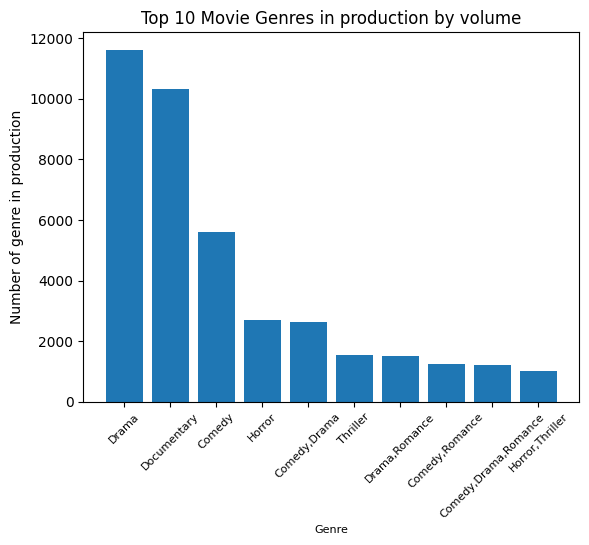

In [23]:
#plot bar graph for top ten moview genres in production. 


fig, ax = plt.subplots()

ax.bar(top_10_im_movies_genre_df, top_10_im_movies_genre_df_counts)

ax.tick_params(axis='x', labelsize=8, rotation=45)

ax.set_title("Top 10 Movie Genres in production by volume")
ax.set_xlabel('Genre', fontsize=8)
ax.set_ylabel('Number of genre in production')


## Top rated movie genres. 

The next step of this analysis will focus on the highest rated genre of movies under production. we shall used pandas to comes with the top ten rated movies and give their specific rating. 

In [24]:
#Top ten highest movie rating by genre. 

genre_ratings = im_movies_df.groupby('genres')['averagerating'].mean()

# sort the resulting series object by rating in descending order and select the top genres with the highest ratings
top_genres_by_rating = genre_ratings.sort_values(ascending=False).head(10)

top_genres_by_rating

genres
Comedy,Documentary,Fantasy     9.4
Documentary,Family,Musical     9.3
History,Sport                  9.2
Music,Mystery                  9.0
Game-Show                      9.0
Drama,Fantasy,War              8.8
Documentary,News,Sport         8.8
Comedy,Drama,Reality-TV        8.8
Drama,Short                    8.8
Documentary,News,Reality-TV    8.8
Name: averagerating, dtype: float64

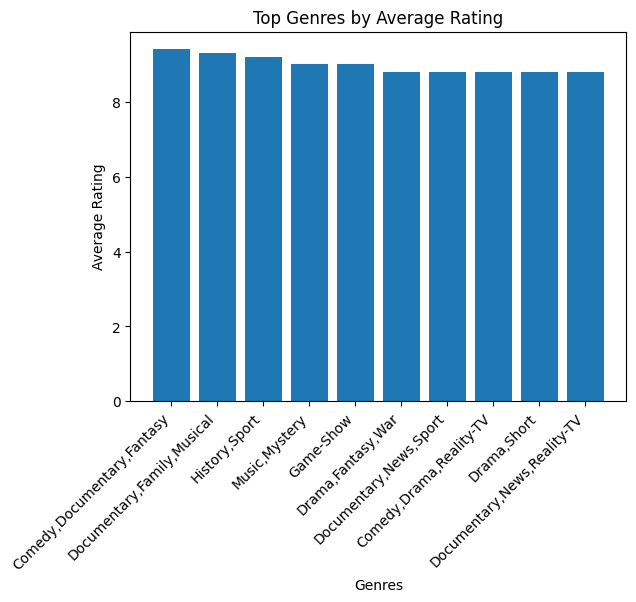

In [25]:
fig, ax = plt.subplots()

# create a bar chart with the genre names on the x-axis and their average ratings on the y-axis
ax.bar(top_genres_by_rating.index, top_genres_by_rating.values)

# set the title and axis labels
ax.set_title('Top Genres by Average Rating')
ax.set_xlabel('Genres')
ax.set_ylabel('Average Rating')

# rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# display the plot
plt.show()


## To find the Highest grossing movies in the database. 

We will merge the dataframe we will combine a third datfrasme with the movies grossing amounts and subsequently do a further analysis on the datafrasme. 

In [27]:
#importing the budget data to apply in the subsequent analysis. 

tn_movie_budget_df = pd.read_csv('/content/tn.movie_budgets.csv.gz')

tn_movie_budget_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [28]:
#Merging the dataframes along the movie names. 

im_movies_df_tn_movie_budget_df = pd.merge(im_movies_df, tn_movie_budget_df, left_on='primary_title', right_on='movie')

im_movies_df_tn_movie_budget_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",tt0249516,1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",tt0337692,6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,tt4339118,6.0,6,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,tt5647250,5.7,127,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,tt8680254,Richard III,Richard III,2016,NaN,Drama,tt8680254,9.1,28,65,"Dec 29, 1995",Richard III,"$9,200,000","$2,684,904","$4,199,334"
2863,tt8824064,Heroes,Heroes,2019,88.0,Documentary,tt8824064,7.3,7,12,"Oct 24, 2008",Heroes,"$400,000","$655,538","$655,538"
2864,tt8976772,Push,Push,2019,92.0,Documentary,tt8976772,7.3,33,70,"Feb 6, 2009",Push,"$38,000,000","$31,811,527","$49,678,401"
2865,tt9024106,Unplanned,Unplanned,2019,106.0,"Biography,Drama",tt9024106,6.3,5945,33,"Mar 29, 2019",Unplanned,"$6,000,000","$18,107,621","$18,107,621"


In [29]:
#checks for the overview of the data. 

im_movies_df_tn_movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 2866
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2867 non-null   object 
 1   primary_title      2867 non-null   object 
 2   original_title     2867 non-null   object 
 3   start_year         2867 non-null   int64  
 4   runtime_minutes    2752 non-null   float64
 5   genres             2867 non-null   object 
 6   movie_id.1         2867 non-null   object 
 7   averagerating      2867 non-null   float64
 8   numvotes           2867 non-null   int64  
 9   id                 2867 non-null   int64  
 10  release_date       2867 non-null   object 
 11  movie              2867 non-null   object 
 12  production_budget  2867 non-null   object 
 13  domestic_gross     2867 non-null   object 
 14  worldwide_gross    2867 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 358.4+ KB


In [30]:
#checks for statistical summary of the data. 

im_movies_df_tn_movie_budget_df.describe(include ='all')

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,2867,2867,2867,2867.000000,2752.000000,2867,2867,2867.000000,2.867000e+03,2867.000000,2867,2867,2867,2867,2867
unique,2745,2126,2302,NaN,NaN,311,2745,NaN,NaN,NaN,1024,2126,320,1884,1976
top,tt2093100,Home,The Gift,NaN,NaN,Drama,tt2093100,NaN,NaN,NaN,"Dec 31, 2014",Home,"$20,000,000",$0,$0
freq,3,24,14,NaN,NaN,319,3,NaN,NaN,NaN,19,24,112,406,275
mean,NaN,NaN,NaN,2013.916638,102.972020,NaN,NaN,6.249111,6.646528e+04,50.967213,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.547187,20.786121,NaN,NaN,1.185953,1.344493e+05,28.680842,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2010.000000,3.000000,NaN,NaN,1.600000,5.000000e+00,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2012.000000,90.000000,NaN,NaN,5.600000,1.465000e+02,27.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2014.000000,101.000000,NaN,NaN,6.400000,7.999000e+03,51.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2016.000000,113.250000,NaN,NaN,7.100000,7.576750e+04,76.000000,NaN,NaN,NaN,NaN,NaN


## Data Cleaning. 

Having had an overview of the data layout, we will proceed to some cleanig. we reaslise the production budget, the domestic gross and the world wide gross amounts are in dollars and have the dollar sign added. We are thus unable to do any statistical analysis on the data. We are thus bound to do a further cleanin gon the data to make it workable. The next few codes willbe used to carry out data cleaning. 

In [31]:
#stripping the data of the dollar sugn character. 

def remove_character(data, cols, characters):
    """simple function to remove characters"""
    # loop through the columns
    for col in cols:
        data[col] = data[col].str.strip(characters)

    return data.head()


remove_character(im_movies_df_tn_movie_budget_df, ['production_budget', 'domestic_gross','worldwide_gross'], '$')

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",tt0249516,1.9,8248,26,"Dec 31, 2012",Foodfight!,"45,000,000",0,"73,706"
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",tt0337692,6.1,37886,17,"Mar 22, 2013",On the Road,"25,000,000","720,828","9,313,302"
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,tt4339118,6.0,6,17,"Mar 22, 2013",On the Road,"25,000,000","720,828","9,313,302"
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,tt5647250,5.7,127,17,"Mar 22, 2013",On the Road,"25,000,000","720,828","9,313,302"
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"91,000,000","58,236,838","187,861,183"


## Stripping the financial data of coma characters. 

The next step will be to to strip the data of comma characters to allow for further statistical examination. 

In [32]:
#stripping the data of the comas 
im_movies_df_tn_movie_budget_df['production_budget'] = im_movies_df_tn_movie_budget_df['production_budget' ].str.replace(',', '')


In [33]:
#stripping the data of the comas 

im_movies_df_tn_movie_budget_df['domestic_gross'] = im_movies_df_tn_movie_budget_df['domestic_gross' ].str.replace(',', '')

In [34]:
#stripping the data of the comas 

im_movies_df_tn_movie_budget_df['worldwide_gross'] = im_movies_df_tn_movie_budget_df['worldwide_gross' ].str.replace(',', '')

In [35]:
#checks for the overview of the data. 

im_movies_df_tn_movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 2866
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2867 non-null   object 
 1   primary_title      2867 non-null   object 
 2   original_title     2867 non-null   object 
 3   start_year         2867 non-null   int64  
 4   runtime_minutes    2752 non-null   float64
 5   genres             2867 non-null   object 
 6   movie_id.1         2867 non-null   object 
 7   averagerating      2867 non-null   float64
 8   numvotes           2867 non-null   int64  
 9   id                 2867 non-null   int64  
 10  release_date       2867 non-null   object 
 11  movie              2867 non-null   object 
 12  production_budget  2867 non-null   object 
 13  domestic_gross     2867 non-null   object 
 14  worldwide_gross    2867 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 358.4+ KB


## Changing the data into float from string objects

The data stripped of comas leave string object characyers, the next step is to change these strings values to float values. 

In [36]:

im_movies_df_tn_movie_budget_df['production_budget'] = im_movies_df_tn_movie_budget_df['production_budget'].str.strip().astype(float)

In [37]:
im_movies_df_tn_movie_budget_df['domestic_gross'] = im_movies_df_tn_movie_budget_df['domestic_gross'].str.strip().astype(float)

In [38]:
im_movies_df_tn_movie_budget_df['worldwide_gross'] = im_movies_df_tn_movie_budget_df['worldwide_gross'].str.strip().astype(float)

In [39]:
#checks for the overview of the data afterchanging them to float character.  

im_movies_df_tn_movie_budget_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 2866
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2867 non-null   object 
 1   primary_title      2867 non-null   object 
 2   original_title     2867 non-null   object 
 3   start_year         2867 non-null   int64  
 4   runtime_minutes    2752 non-null   float64
 5   genres             2867 non-null   object 
 6   movie_id.1         2867 non-null   object 
 7   averagerating      2867 non-null   float64
 8   numvotes           2867 non-null   int64  
 9   id                 2867 non-null   int64  
 10  release_date       2867 non-null   object 
 11  movie              2867 non-null   object 
 12  production_budget  2867 non-null   float64
 13  domestic_gross     2867 non-null   float64
 14  worldwide_gross    2867 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 358.4+ KB


## Domestic and Worldwide gross summation and profit margins. 

The next steps of the analysis takes into account the total profits made locally and abroad from the movie sales, ultimaltely we need to be able to check the highest grossing movies by their genress. 

In [40]:
#summation of domestic and wolrdwide movie gross sales

im_movies_df_tn_movie_budget_df['domestic_worldwide_gross'] = im_movies_df_tn_movie_budget_df.apply(lambda x: x['domestic_gross'] + x['worldwide_gross'], axis=1)

In [41]:
# the profit margins which is the difference between the gross sales and the production cost

im_movies_df_tn_movie_budget_df['profit_margins'] = im_movies_df_tn_movie_budget_df.apply(lambda x: x['domestic_worldwide_gross'] - x['production_budget'], axis=1)

In [42]:
#checks for the overview of the data with the additional columns  

im_movies_df_tn_movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 2866
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movie_id                  2867 non-null   object 
 1   primary_title             2867 non-null   object 
 2   original_title            2867 non-null   object 
 3   start_year                2867 non-null   int64  
 4   runtime_minutes           2752 non-null   float64
 5   genres                    2867 non-null   object 
 6   movie_id.1                2867 non-null   object 
 7   averagerating             2867 non-null   float64
 8   numvotes                  2867 non-null   int64  
 9   id                        2867 non-null   int64  
 10  release_date              2867 non-null   object 
 11  movie                     2867 non-null   object 
 12  production_budget         2867 non-null   float64
 13  domestic_gross            2867 non-null   float64
 14  worldwid

In [43]:
#mean profitmargins by movie  genre. 

profit_margins_df = im_movies_df_tn_movie_budget_df.groupby("genres")["profit_margins"].agg("mean").astype(float)

profit_margins_df

genres
Action                        6.836908e+07
Action,Adventure             -3.561111e+06
Action,Adventure,Animation    4.789828e+08
Action,Adventure,Biography    1.737994e+08
Action,Adventure,Comedy       3.524199e+08
                                  ...     
Sci-Fi,Thriller               2.277576e+07
Sport                        -7.943943e+06
Thriller                      6.925048e+07
War                           2.039821e+07
Western                      -1.912819e+06
Name: profit_margins, Length: 311, dtype: float64

In [44]:
#sorting the profit margins by the top ten grossing movie genre. 

top_10_profit_margins_df = profit_margins_df.sort_values(ascending=False)[:10]
top_10_profit_margins_df.astype(float)

genres
Adventure,Drama,Sport            1.523208e+09
Fantasy,Romance                  1.523208e+09
Family,Fantasy,Musical           1.283851e+09
Adventure,Fantasy                6.624354e+08
Action,Adventure,Sci-Fi          6.588433e+08
Fantasy,Musical                  5.783411e+08
Biography,Documentary,History    5.206793e+08
Drama,Family,Fantasy             4.931971e+08
Comedy,Romance,Sci-Fi            4.919102e+08
Adventure,Drama,Sci-Fi           4.823675e+08
Name: profit_margins, dtype: float64

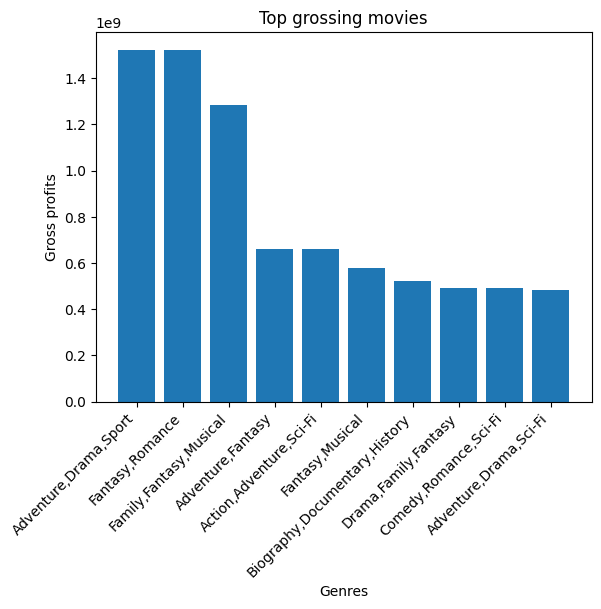

In [45]:
#plotting a bar graph with the top ten grossing movies by genre. 

fig, ax = plt.subplots()

# create a bar chart with the genre names on the x-axis and their average ratings on the y-axis
ax.bar(top_10_profit_margins_df.index, top_10_profit_margins_df.values)

# set the title and axis labels
ax.set_title('Top grossing movies')
ax.set_xlabel('Genres')
ax.set_ylabel('Gross profits')

# rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# display the plot
plt.show()


## SUMMARY AND CONCLUSIONS

From the analysis we were able to pick out the following fsacts around the movies in the given dataset. 


*   The three top genres in production are drama, documentary and comedy. In the event that the movie house intends to reach to the largest audience, these three genres would be a good place to get started. 

*   On the highest rsted movies, the clear outcome from that analysis will be deebunked in the next conclusion that the highest rating movies are not necessaily the ones that rack in the most profits or the highest viewership. 

*   We were also able to pick out the highest grossing movies. The top three being 

1.   Adventure, drama, sport
2.   Fantasy,romance

1.   Family, fantasy, musical

These would be the top three recommendations to the production house were we to realise the highest profit margins. 